In [3]:
import pandas as pd
from sodapy import Socrata
import requests
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
file = pd.read_csv(r"COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv",sep=',')
df = pd.DataFrame(file)

In [58]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df_s2020 = df[(df['date'].dt.date > pd.to_datetime('2020-01-01')) & (df['date'].dt.date < pd.to_datetime('2020-06-30'))]

C:\Users\ferch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [8]:
df_grouped = df_s2020.groupby(by='state').sum()

In [9]:
df_grouped.sort_values(by='inpatient_beds_used_covid', ascending=False)['inpatient_beds_used_covid']

state
NY    685102.0
CA    427934.0
FL    315219.0
TX    239066.0
IL    212463.0
MA    195002.0
NJ    187680.0
PA    181020.0
MI    170210.0
GA    164156.0
AZ    139630.0
MD    120517.0
LA    116659.0
IN     89254.0
CT     88544.0
OH     78042.0
NC     65978.0
VA     63539.0
MO     63124.0
NV     62557.0
WA     52422.0
MS     51030.0
AL     50522.0
MN     46363.0
SC     44275.0
TN     43234.0
KY     42203.0
WI     33857.0
CO     33261.0
DC     33157.0
OK     33090.0
IA     23737.0
NE     23417.0
RI     21925.0
AR     20611.0
DE     19290.0
UT     18051.0
KS     17317.0
NM     16369.0
PR     14407.0
OR     14187.0
WV     13163.0
NH      8973.0
ME      6855.0
SD      5141.0
ND      4472.0
ID      3607.0
MT      2532.0
WY      2221.0
HI      2132.0
VT      1966.0
AK      1699.0
VI       146.0
Name: inpatient_beds_used_covid, dtype: float64

**2- Ocupacion de camas por COVID en NY**  
Identificar:  
- Intervalos crecimiento y decrecimiento  
- Puntos críticos: mínimos y máximos

In [65]:
df_ny = df[df['state'] == 'NY']

In [66]:
media = df_ny['inpatient_beds_used_covid'].mean()
media

3925.2576966932725

In [68]:
df_ny.rename(columns={'inpatient_beds_used_covid':'Camas comunes usadas por COVID'},inplace=True)

C:\Users\ferch\AppData\Local\Temp\ipykernel_2096\1634115418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny.rename(columns={'inpatient_beds_used_covid':'Camas comunes usadas por COVID'},inplace=True)


<AxesSubplot:xlabel='date', ylabel='Camas comunes usadas por COVID'>

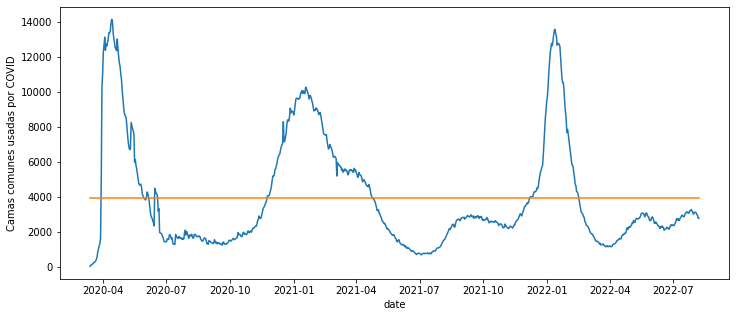

In [69]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df_ny['date'],y=df_ny['Camas comunes usadas por COVID'])
sns.lineplot(x=df_ny['date'],y=media)

In [13]:
fecha1 = "2020-09-01"
fecha2 = '2021-09-01'
fecha1 = '2022-05-01'

In [70]:
df_fecha1 = df_ny[df_ny.date.dt.date < pd.to_datetime("2020-09-01")]
max1 = df_fecha1['Camas comunes usadas por COVID'].max()
min1 = df_fecha1['Camas comunes usadas por COVID'].min()
fecha_min1 = df_fecha1[df_fecha1['Camas comunes usadas por COVID']==min1]['date'].values
fecha_max1 = df_fecha1[df_fecha1['Camas comunes usadas por COVID']==max1]['date'].values

C:\Users\ferch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


C:\Users\ferch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


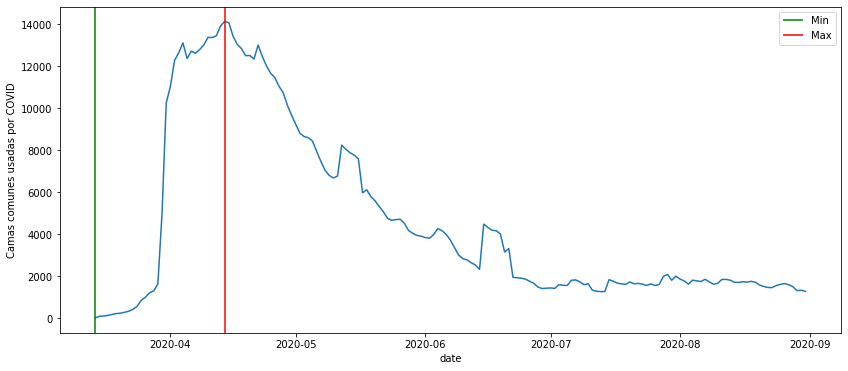

In [84]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.lineplot(df_fecha1['date'],df_fecha1['Camas comunes usadas por COVID'])
ax2 = ax
ymin, ymax = ax2.get_ylim()
ax2.set_ylim(ymin, ymax)
ax2 = plt.vlines(x=fecha_min1,ymin=ymin,ymax=ymax,color='green',label='Min')
ax3 = plt.vlines(x=fecha_max1,ymin=ymin,ymax=ymax,color='red',label='Max')
plt.legend()

In [81]:
df_fecha2 = df_ny[(df_ny.date.dt.date >= pd.to_datetime("2020-09-01")) & (df_ny.date.dt.date < pd.to_datetime("2021-09-01"))]
max2 = df_fecha2['Camas comunes usadas por COVID'].max()
min2 = df_fecha2['Camas comunes usadas por COVID'].min()
fecha_min = df_fecha2[df_fecha2['Camas comunes usadas por COVID'] == min2]['date'].values
fecha_max = df_fecha2[df_fecha2['Camas comunes usadas por COVID'] == max2]['date'].values

C:\Users\ferch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


C:\Users\ferch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


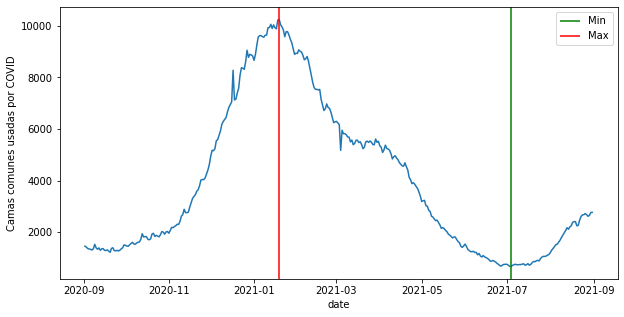

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(df_fecha2['date'],df_fecha2['Camas comunes usadas por COVID'])
ax2 = ax
ymin, ymax = ax2.get_ylim()
ax2.set_ylim(ymin, ymax)
ax2 = plt.vlines(x=fecha_min,ymin=ymin,ymax=ymax,color='green',label='Min')
ax3 = plt.vlines(x=fecha_max,ymin=ymin,ymax=ymax,color='red',label='Max')
plt.legend()

In [77]:
df_fecha3 = df_ny[df_ny.date.dt.date > pd.to_datetime('2021-09-01')]
max3 = df_fecha3['Camas comunes usadas por COVID'].max()
min3 = df_fecha3['Camas comunes usadas por COVID'].min()
fecha_min3 = df_fecha3[df_fecha3['Camas comunes usadas por COVID'] == min3]['date'].values
fecha_max3 = df_fecha3[df_fecha3['Camas comunes usadas por COVID'] == max3]['date'].values

C:\Users\ferch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [86]:
fecha_max3

array(['2022-01-12T00:00:00.000000000'], dtype='datetime64[ns]')

C:\Users\ferch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


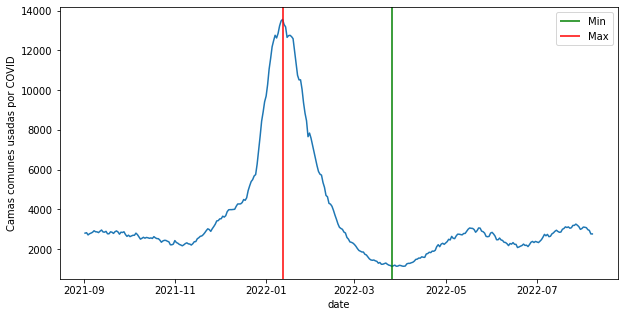

In [78]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(df_fecha3['date'],df_fecha3['Camas comunes usadas por COVID'])
ax2 = ax
ymin, ymax = ax2.get_ylim()
ax2.set_ylim(ymin, ymax)
ax2 = plt.vlines(x=fecha_min3,ymin=ymin,ymax=ymax,color='green',label='Min')
ax3 = plt.vlines(x=fecha_max3,ymin=ymin,ymax=ymax,color='red',label='Max')
plt.legend()

**-3 5 estados que más camas UCI usaron en 2020**

Genero un dataframe con datos de 2020 y selecciono columnas con datos de ocupacion de camas de UCI tanto para adultos como pediatricas.
Calculo el valor total de ocupacion UCI como la suma de adultos+pediatricos y agrupo los datos por estado y considerando el total de la suma de los campos.

In [21]:
fecha = dt.date(year=2020,month=12,day=31)
df_2020 = df[df['date'].dt.date <= fecha]
#df_2020[['staffed_adult_icu_bed_occupancy','staffed_pediatric_icu_bed_occupancy']]
df_2020['icu'] = df_2020['staffed_adult_icu_bed_occupancy'] + df_2020['staffed_pediatric_icu_bed_occupancy']

C:\Users\ferch\AppData\Local\Temp\ipykernel_2096\2327384531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['icu'] = df_2020['staffed_adult_icu_bed_occupancy'] + df_2020['staffed_pediatric_icu_bed_occupancy']


In [22]:
df_2020_icu = df_2020[['state','staffed_adult_icu_bed_occupancy','staffed_pediatric_icu_bed_occupancy','icu']]

In [23]:
df_2020_icu= df_2020_icu.groupby(by='state').sum()
df_2020_icu.sort_values(by='icu',ascending=False).head(5)

,staffed_adult_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy,icu
state,,,
CA,901654.0,221557.0,1123211.0
TX,991193.0,55836.0,1047029.0
FL,799387.0,96279.0,895666.0
NY,495372.0,137917.0,633289.0
PA,465537.0,102167.0,567704.0


**-4 Cantidad de camas utilizadas por estado para pacientes pediatricos en 2020**
¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [87]:
for column in df.columns:
    if 'pediatric' in column and 'cover' not in column:
        print(column)

previous_day_admission_pediatric_covid_confirmed
previous_day_admission_pediatric_covid_suspected
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid
total_pediatric_patients_hospitalized_confirmed_covid
all_pediatric_inpatient_bed_occupied
all_pediatric_inpatient_beds
previous_day_admission_pediatric_covid_confirmed_0_4
previous_day_admission_pediatric_covid_confirmed_12_17
previous_day_admission_pediatric_covid_confirmed_5_11
previous_day_admission_pediatric_covid_confirmed_unknown
staffed_icu_pediatric_patients_confirmed_covid
staffed_pediatric_icu_bed_occupancy
total_staffed_pediatric_icu_beds


In [24]:
df_2020_icu.sort_values(by='staffed_pediatric_icu_bed_occupancy',ascending=False).head(5)

,staffed_adult_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy,icu
state,,,
CA,901654.0,221557.0,1123211.0
NY,495372.0,137917.0,633289.0
PA,465537.0,102167.0,567704.0
FL,799387.0,96279.0,895666.0
IL,348276.0,88676.0,436952.0


**-5 Porcentaje de camas UCI ocupadas por COVID, por estado.

In [114]:
df_uci = df[['date','state','staffed_adult_icu_bed_occupancy','staffed_icu_adult_patients_confirmed_covid','staffed_icu_pediatric_patients_confirmed_covid','staffed_pediatric_icu_bed_occupancy']]

In [115]:
df_uci.dropna(inplace=True)

C:\Users\ferch\AppData\Local\Temp\ipykernel_2096\1270820282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uci.dropna(inplace=True)


In [108]:
i=0
for item in df_uci['staffed_icu_adult_patients_confirmed_covid']:
    i+=1
    if isinstance(item,str):
        print(item)
print(i)

47747


In [109]:
df_uci.head()

,date,state,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid,staffed_pediatric_icu_bed_occupancy,percentageUci
0,2020-12-27,RI,150.0,54.0,NaN,70.0,NaN
1,2020-12-22,IA,486.0,138.0,NaN,0.0,NaN
2,2020-10-16,VT,75.0,0.0,0.0,19.0,0.0
3,2020-10-15,VI,10.0,1.0,NaN,NaN,NaN
4,2020-10-13,VI,10.0,1.0,NaN,NaN,NaN


In [116]:
df_uci['percentageUci'] = (df_uci['staffed_icu_adult_patients_confirmed_covid']+df_uci['staffed_icu_pediatric_patients_confirmed_covid'])/(df_uci['staffed_adult_icu_bed_occupancy']+df_uci['staffed_pediatric_icu_bed_occupancy'])*100

C:\Users\ferch\AppData\Local\Temp\ipykernel_2096\4099794546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uci['percentageUci'] = (df_uci['staffed_icu_adult_patients_confirmed_covid']+df_uci['staffed_icu_pediatric_patients_confirmed_covid'])/(df_uci['staffed_adult_icu_bed_occupancy']+df_uci['staffed_pediatric_icu_bed_occupancy'])*100


In [119]:
df_uci.groupby(by='state').mean().sort_values(by='percentageUci', ascending=False)

,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid,staffed_pediatric_icu_bed_occupancy,percentageUci
state,,,,,
NJ,1147.796923,129.861538,1.587692,49.993846,43.475605
MS,566.894260,132.229607,1.223565,39.734139,22.969405
KY,1056.518293,142.585366,1.060976,25.195122,20.018523
AR,689.365123,166.580381,2.735695,122.286104,19.533606
OK,753.474474,156.573574,2.384384,101.147147,19.260097
MT,129.379487,29.866667,0.297436,15.979487,18.560607
GA,1882.583832,341.023952,4.077844,176.032934,18.433748
TX,5463.450151,1104.129909,14.087613,654.833837,18.274122
NV,640.421875,121.343750,2.493750,40.418750,18.049449


**- 6 Muertes por covid, por Estado, durante el año 2021**

In [120]:
df_2021 = df[(df['date'].dt.date >= dt.date(2021,1,1)) & (df['date'].dt.date <= dt.date(2021,12,31))]

In [30]:
df_2021 = df_2021[['date','state','deaths_covid']]

In [31]:
df_2021.groupby(by='state').sum()

,deaths_covid
state,
AK,614.0
AL,6390.0
AR,3582.0
AS,0.0
AZ,16250.0
CA,35108.0
CO,2835.0
CT,2725.0
DC,532.0


**-7 Relación entre la falta de staff con la cantidad de muertes durante el año 2021**

In [32]:
df_2021 = df[(df['date'].dt.date >= dt.date(2021,1,1)) & (df['date'].dt.date <= dt.date(2021,12,31))]
df_2021 = df_2021[['date','state','critical_staffing_shortage_today_yes','deaths_covid']]

In [33]:
df_21_deathsbydeath = df_2021.groupby(by='state').sum().sort_values(by='deaths_covid',ascending=False)
df_21_deathsbydeath.head()

,critical_staffing_shortage_today_yes,deaths_covid
state,,
CA,35082,35108.0
TX,27164,32889.0
FL,7993,26004.0
NY,2643,17620.0
AZ,10783,16250.0


In [34]:
df_21_deathsbystaff = df_2021.groupby(by='state').sum().sort_values(by='critical_staffing_shortage_today_yes',ascending=False)
df_21_deathsbystaff.drop(columns='deaths_covid').head(5)

,critical_staffing_shortage_today_yes
state,
CA,35082
TX,27164
LA,17531
OK,13242
GA,12194


In [35]:
df_2021_ca = df_2021[df_2021['state']=='CA'].reset_index(drop=True)

In [36]:
x = df_2021_ca['date']
y1 = df_2021_ca['critical_staffing_shortage_today_yes']
y2 = df_2021_ca['deaths_covid']

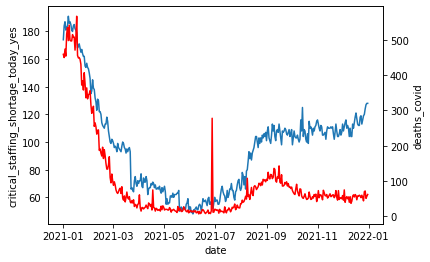

In [37]:
fig, ax = plt.subplots()
ax = sns.lineplot(x=x,y=y1)
ax2 = ax.twinx()
ax2 = sns.lineplot(x=x,y=y2,color='red')

In [38]:
fecha_l = dt.date(2021,6,25)
df_2021_ca[df_2021_ca['date'].dt.date > fecha_l].sort_values(by='date',ascending=True)

,date,state,critical_staffing_shortage_today_yes,deaths_covid
256,2021-06-26,CA,55,8.0
121,2021-06-27,CA,57,16.0
168,2021-06-28,CA,54,278.0
110,2021-06-29,CA,52,12.0
158,2021-06-30,CA,56,12.0
...,...,...,...,...
33,2021-12-27,CA,120,70.0
4,2021-12-28,CA,124,72.0
19,2021-12-29,CA,127,51.0
32,2021-12-30,CA,128,57.0


In [39]:
df_2021_ca.drop(index=168,inplace=True)

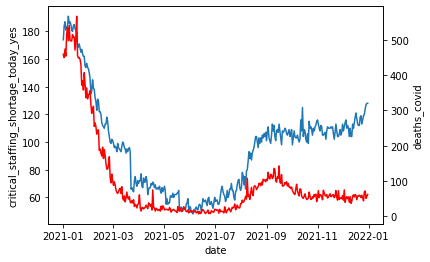

In [40]:
x = df_2021_ca['date']
y1 = df_2021_ca['critical_staffing_shortage_today_yes']
y2 = df_2021_ca['deaths_covid']

fig, ax = plt.subplots()
ax = sns.lineplot(x=x,y=y1)
ax2 = ax.twinx()
ax2 = sns.lineplot(x=x,y=y2,color='red')

In [41]:
def plotDeathsStaff(state):
    nombre='df_2021_'+state
    nombre = df_2021[df_2021['state']==state].reset_index(drop=True)
    x=nombre['date']
    y1=nombre['critical_staffing_shortage_today_yes']
    y2=nombre['deaths_covid']
    fig, ax = plt.subplots(sharex=True,figsize=(12,6))
    ax = sns.lineplot(x=x,y=y1,)
    ax2 = sns.lineplot(x=x,y=y2,color='red')
    plt.legend(['Medical Centers reporting Critical Staff Shortage','Covid deaths'])
    
    

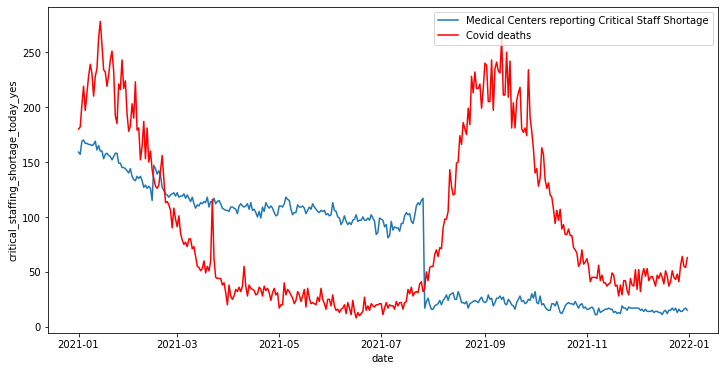

In [42]:
plotDeathsStaff('TX')

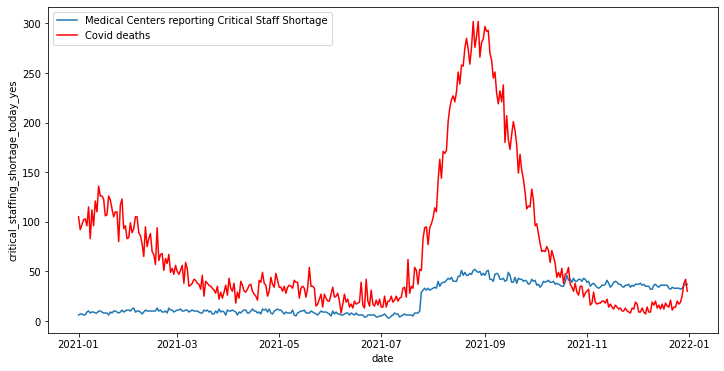

In [43]:
plotDeathsStaff('FL')

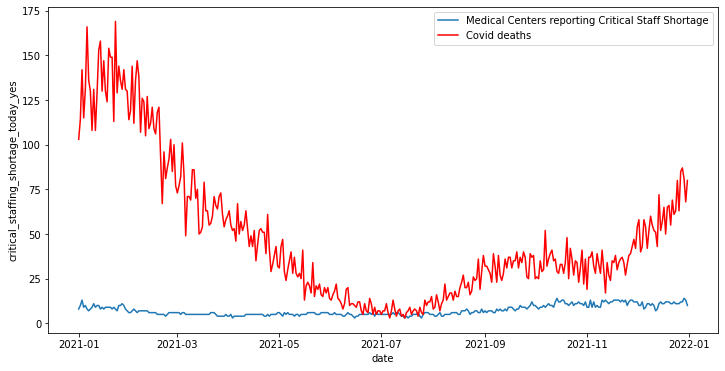

In [44]:
plotDeathsStaff('NY')

In [45]:
for column in df.columns:
    if 'occupancy' in column:
        print(column)

staffed_adult_icu_bed_occupancy
staffed_adult_icu_bed_occupancy_coverage
staffed_pediatric_icu_bed_occupancy
staffed_pediatric_icu_bed_occupancy_coverage


In [137]:
df_8= df[['date','inpatient_beds_used_covid','critical_staffing_shortage_today_yes','deaths_covid','staffed_pediatric_icu_bed_occupancy','staffed_adult_icu_bed_occupancy']]

In [138]:
df_8['date'] = pd.to_datetime(df_8['date'])

C:\Users\ferch\AppData\Local\Temp\ipykernel_2096\1996623783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['date'] = pd.to_datetime(df_8['date'])


In [125]:
df_8.set_index('date',drop=True,inplace=True)

In [139]:
y1 = df_8[['inpatient_beds_used_covid','critical_staffing_shortage_today_yes','staffed_pediatric_icu_bed_occupancy','staffed_adult_icu_bed_occupancy']]
y2 = df_8['deaths_covid']

In [145]:
df_8['mes'] = df_8['date'].dt.to_period('M')

C:\Users\ferch\AppData\Local\Temp\ipykernel_2096\232805981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['mes'] = df_8['date'].dt.to_period('M')


In [149]:
df_8['mes']

0        2020-12
1        2020-12
2        2020-10
3        2020-10
4        2020-10
          ...   
47742    2022-02
47743    2022-02
47744    2022-02
47745    2022-02
47746    2022-02
Name: mes, Length: 47747, dtype: period[M]

In [146]:
df_8_mensual= df_8.groupby(by='mes').sum()

In [147]:
y1 = df_8_mensual[['inpatient_beds_used_covid','critical_staffing_shortage_today_yes','staffed_pediatric_icu_bed_occupancy','staffed_adult_icu_bed_occupancy']]
y2 = df_8_mensual['deaths_covid']

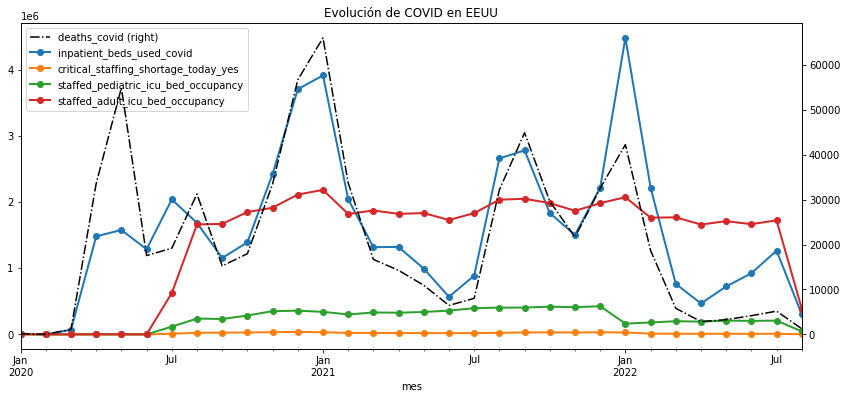

In [148]:
ax = df_8_mensual[['deaths_covid']].plot(linestyle='-.',secondary_y=True,color='black')
df_8_mensual[['inpatient_beds_used_covid','critical_staffing_shortage_today_yes','staffed_pediatric_icu_bed_occupancy','staffed_adult_icu_bed_occupancy']].plot(linestyle='-', marker='o',ax=ax,linewidth=2)
fig = plt.gcf()
fig.tight_layout
plt.title('Evolución de COVID en EEUU')
plt.ylabel

fig.set_size_inches(14,6)

In [144]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode("WA")
print(location.address.split(',')[0])

Washington


In [ ]:
df_sum = df[['date','state','deaths_covid']].groupby(by='state').sum()
df_sum['state'] = df_sum.index

Algunas conclusiones y recomendaciones:
- El dataset posee demasiadas inconsistencias. Sería optimo avanzar hacia una estandarizacion para el reporte de informacion vinculada a pandemias. Muchos campos brindan informacion redundante con respecto a otros y se puede observar en la descripcion de los mismos que muchos tomaron caracter de obligatorio apenas recientemente.
- A priori, la correlación entre falta de personal y muertes parece ser escasa. Se destaca el estado de Nueva York, con escasos reportes de falta de personal y altos niveles de muertes, en comparacion con otros estados con reportes de falta de personal comparables.  
- Los peores momentos de ingresos y muertes pueden encontrarse en epoca invernal (Dic-Feb), por lo que se recomienda ajustar la capacidad hospitalaria especialmente para esas épocas, afectando una mayor dotacion de personal a servicio de guardias pasivas.
- A partir del análisis de intervalos de crecimiento/decrecimiento para el estado de Nueva York, uno de los estados con mayor número de pacientes hospitalizados y de muertos por COVID, puede observarse que a partir de un pico de casos, la tasa de decrecimiento es alta y, a los 2 meses se observa una reducción de entre el 60% y el 85%. Esto puede servir para identificar oportunidades para redistribuir recursos y adecuar capacidad hospitalaria.